In [1]:
import requests

In [13]:
def fetch_problems():
    url = "https://codeforces.com/api/problemset.problems"
    response = requests.get(url)
    response.raise_for_status() 
    return response.json()

def get_problems_sorted_by_submissions():
    data = fetch_problems()
    problems = data['result']['problems']
    problem_stats = data['result']['problemStatistics']

    # Combine problem details with their stats
    problems_with_stats = []
    for problem, stats in zip(problems, problem_stats):
        problem_with_stats = {
            'name': problem['name'],
            'contestId': problem.get('contestId', None),
            'index': problem['index'],
            'submissions': stats['solvedCount']
        }
        problems_with_stats.append(problem_with_stats)

    # Sort problems by the number of submissions in descending order
    problems_sorted = sorted(problems_with_stats, key=lambda x: x['submissions'], reverse=True)
    return problems_sorted

def get_problems_sorted_by_accepted_submissions():
    data = fetch_problems()
    problems = data['result']['problems']
    problem_stats = data['result']['problemStatistics']

    # Combine problem details with their stats
    problems_with_stats = []
    for problem, stats in zip(problems, problem_stats):
        problem_with_stats = {
            'name': problem['name'],
            'contestId': problem.get('contestId', None),
            'index': problem['index'],
            'accepted_submissions': stats['solvedCount'],
            'rating': problem.get('rating', None)
        }
        problems_with_stats.append(problem_with_stats)
    problems_sorted = sorted(problems_with_stats, key=lambda x: x['accepted_submissions'], reverse=True)
    return problems_sorted

In [3]:
problems_sorted = get_problems_sorted_by_submissions()
for problem in problems_sorted[:10]:  # Display top 10 problems
    print(f"ContestId: {problem['contestId']}, Index: {problem['index']}, Name: {problem['name']}, Submissions: {problem['submissions']}")

ContestId: 4, Index: A, Name: Watermelon, Submissions: 493738
ContestId: 71, Index: A, Name: Way Too Long Words, Submissions: 363165
ContestId: 231, Index: A, Name: Team, Submissions: 307146
ContestId: 1, Index: A, Name: Theatre Square, Submissions: 250772
ContestId: 282, Index: A, Name: Bit++, Submissions: 244424
ContestId: 158, Index: A, Name: Next Round, Submissions: 237662
ContestId: 50, Index: A, Name: Domino piling, Submissions: 234209
ContestId: 263, Index: A, Name: Beautiful Matrix, Submissions: 231247
ContestId: 112, Index: A, Name: Petya and Strings, Submissions: 214384
ContestId: 339, Index: A, Name: Helpful Maths, Submissions: 203493


In [4]:
data = fetch_problems()
problems = data['result']['problems']
problem_stats = data['result']['problemStatistics']

In [5]:
data.keys()

dict_keys(['status', 'result'])

In [6]:
data['result'].keys()

dict_keys(['problems', 'problemStatistics'])

In [7]:
len(data['result']['problems'])

9636

In [8]:
problems = data['result']['problems']
problems[0]

{'contestId': 1989,
 'index': 'F',
 'name': 'Simultaneous Coloring',
 'type': 'PROGRAMMING',
 'rating': 3000,
 'tags': ['dfs and similar', 'divide and conquer', 'graphs']}

In [9]:
stats = data['result']['problemStatistics']
stats[0]

{'contestId': 1989, 'index': 'F', 'solvedCount': 158}

In [14]:
problems_sorted = get_problems_sorted_by_accepted_submissions()
for problem in problems_sorted[:100]:  # Display top 10 problems
    print(f"ContestId: {problem['contestId']}, Index: {problem['index']}, Name: {problem['name']}, Accepted Submissions: {problem['accepted_submissions']}, Rating: {problem['rating']}")

ContestId: 4, Index: A, Name: Watermelon, Accepted Submissions: 493739, Rating: 800
ContestId: 71, Index: A, Name: Way Too Long Words, Accepted Submissions: 363165, Rating: 800
ContestId: 231, Index: A, Name: Team, Accepted Submissions: 307146, Rating: 800
ContestId: 1, Index: A, Name: Theatre Square, Accepted Submissions: 250772, Rating: 1000
ContestId: 282, Index: A, Name: Bit++, Accepted Submissions: 244425, Rating: 800
ContestId: 158, Index: A, Name: Next Round, Accepted Submissions: 237662, Rating: 800
ContestId: 50, Index: A, Name: Domino piling, Accepted Submissions: 234209, Rating: 800
ContestId: 263, Index: A, Name: Beautiful Matrix, Accepted Submissions: 231248, Rating: 800
ContestId: 112, Index: A, Name: Petya and Strings, Accepted Submissions: 214384, Rating: 800
ContestId: 339, Index: A, Name: Helpful Maths, Accepted Submissions: 203493, Rating: 800
ContestId: 281, Index: A, Name: Word Capitalization, Accepted Submissions: 200978, Rating: 800
ContestId: 236, Index: A, Name

In [18]:
problems = problems_sorted[:100]

In [15]:
type(problems)

list

In [16]:
type(problems[0])

dict

(array([72.,  0., 10.,  0., 10.,  0.,  2.,  0.,  2.,  4.]),
 array([ 800.,  850.,  900.,  950., 1000., 1050., 1100., 1150., 1200.,
        1250., 1300.]),
 <BarContainer object of 10 artists>)

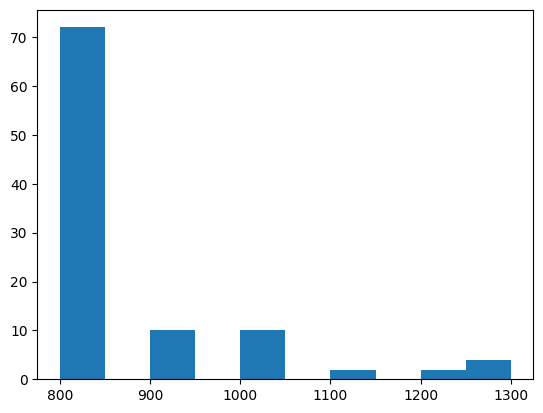

In [20]:
import matplotlib.pyplot as plt

plt.hist([problem['rating'] for problem in problems if problem['rating'] is not None])